#Data Preprocessing.
Will include:


1.   Missing values detection and correction.
2.   Outliers detection and correction.

Melbourne Housing Snapshot data has been used from [Kaggle](https://www.kaggle.com/datasets/dansbecker/melbourne-housing-snapshot).

In [54]:
import pandas as pd
df = pd.read_csv("https://raw.githubusercontent.com/harshitsahush/machine_learning_datasets/main/melbourne_housing_snapshot_kaggle.csv")
print(df)

              Suburb           Address  Rooms Type      Price Method  \
0         Abbotsford      85 Turner St      2    h  1480000.0      S   
1         Abbotsford   25 Bloomburg St      2    h  1035000.0      S   
2         Abbotsford      5 Charles St      3    h  1465000.0     SP   
3         Abbotsford  40 Federation La      3    h   850000.0     PI   
4         Abbotsford       55a Park St      4    h  1600000.0     VB   
...              ...               ...    ...  ...        ...    ...   
13575  Wheelers Hill      12 Strada Cr      4    h  1245000.0      S   
13576   Williamstown     77 Merrett Dr      3    h  1031000.0     SP   
13577   Williamstown       83 Power St      3    h  1170000.0      S   
13578   Williamstown      96 Verdon St      4    h  2500000.0     PI   
13579     Yarraville        6 Agnes St      4    h  1285000.0     SP   

        SellerG        Date  Distance  Postcode  ...  Bathroom  Car  Landsize  \
0        Biggin   3/12/2016       2.5    3067.0  ...  

#Missing data

##Detection

In [55]:
print(df.isna().sum())

Suburb              0
Address             0
Rooms               0
Type                0
Price               0
Method              0
SellerG             0
Date                0
Distance            0
Postcode            0
Bedroom2            0
Bathroom            0
Car                62
Landsize            0
BuildingArea     6450
YearBuilt        5375
CouncilArea      1369
Lattitude           0
Longtitude          0
Regionname          0
Propertycount       0
dtype: int64


##Correction

###Categorical data

Car, CouncilArea, YearBuilt are categorical.

####Method 1:Drop the values.
Since 'Car' == 62 missing, simply drop rows where  None.

In [56]:
df_subset = df[df["Car"].isna() == False]
print(df_subset.isna().sum())

Suburb              0
Address             0
Rooms               0
Type                0
Price               0
Method              0
SellerG             0
Date                0
Distance            0
Postcode            0
Bedroom2            0
Bathroom            0
Car                 0
Landsize            0
BuildingArea     6417
YearBuilt        5344
CouncilArea      1307
Lattitude           0
Longtitude          0
Regionname          0
Propertycount       0
dtype: int64


####Method 2:Fill with new value.
Fill 'CouncilArea' with a new value Unknown.

In [57]:
import numpy as np
df_subset['CouncilArea'].replace({np.nan : 'Absent'}, inplace = True)
print(df_subset.isna().sum())

Suburb              0
Address             0
Rooms               0
Type                0
Price               0
Method              0
SellerG             0
Date                0
Distance            0
Postcode            0
Bedroom2            0
Bathroom            0
Car                 0
Landsize            0
BuildingArea     6417
YearBuilt        5344
CouncilArea         0
Lattitude           0
Longtitude          0
Regionname          0
Propertycount       0
dtype: int64


<ipython-input-57-d2c92072e2d5>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_subset['CouncilArea'].replace({np.nan : 'Absent'}, inplace = True)


####Method 4: Fill with mode(most frequent value)
Fill 'YearBuilt' with the mode.

In [58]:
temp = df_subset['YearBuilt'].mode()[0]
df_subset['YearBuilt'].replace({np.nan : temp}, inplace = True)
print(df_subset.isna().sum())

Suburb              0
Address             0
Rooms               0
Type                0
Price               0
Method              0
SellerG             0
Date                0
Distance            0
Postcode            0
Bedroom2            0
Bathroom            0
Car                 0
Landsize            0
BuildingArea     6417
YearBuilt           0
CouncilArea         0
Lattitude           0
Longtitude          0
Regionname          0
Propertycount       0
dtype: int64


<ipython-input-58-a4588cdf18d7>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_subset['YearBuilt'].replace({np.nan : temp}, inplace = True)


###Non-categorical data

'BuildingArea' is a continuous data here, hence replacing it with mean.

In [59]:
temp = df_subset['BuildingArea'].mean()
df_subset['BuildingArea'].replace({np.nan : temp}, inplace = True)
print(df_subset.isna().sum())

Suburb           0
Address          0
Rooms            0
Type             0
Price            0
Method           0
SellerG          0
Date             0
Distance         0
Postcode         0
Bedroom2         0
Bathroom         0
Car              0
Landsize         0
BuildingArea     0
YearBuilt        0
CouncilArea      0
Lattitude        0
Longtitude       0
Regionname       0
Propertycount    0
dtype: int64


<ipython-input-59-5c38c38f877e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_subset['BuildingArea'].replace({np.nan : temp}, inplace = True)


#Outliers

##Detection


Easiest method is to draw a histogram, and remove the areas where very less values are present, which might skew the data.

array([[<Axes: title={'center': 'Rooms'}>,
        <Axes: title={'center': 'Price'}>,
        <Axes: title={'center': 'Distance'}>,
        <Axes: title={'center': 'Postcode'}>],
       [<Axes: title={'center': 'Bedroom2'}>,
        <Axes: title={'center': 'Bathroom'}>,
        <Axes: title={'center': 'Car'}>,
        <Axes: title={'center': 'Landsize'}>],
       [<Axes: title={'center': 'BuildingArea'}>,
        <Axes: title={'center': 'YearBuilt'}>,
        <Axes: title={'center': 'Lattitude'}>,
        <Axes: title={'center': 'Longtitude'}>],
       [<Axes: title={'center': 'Propertycount'}>, <Axes: >, <Axes: >,
        <Axes: >]], dtype=object)

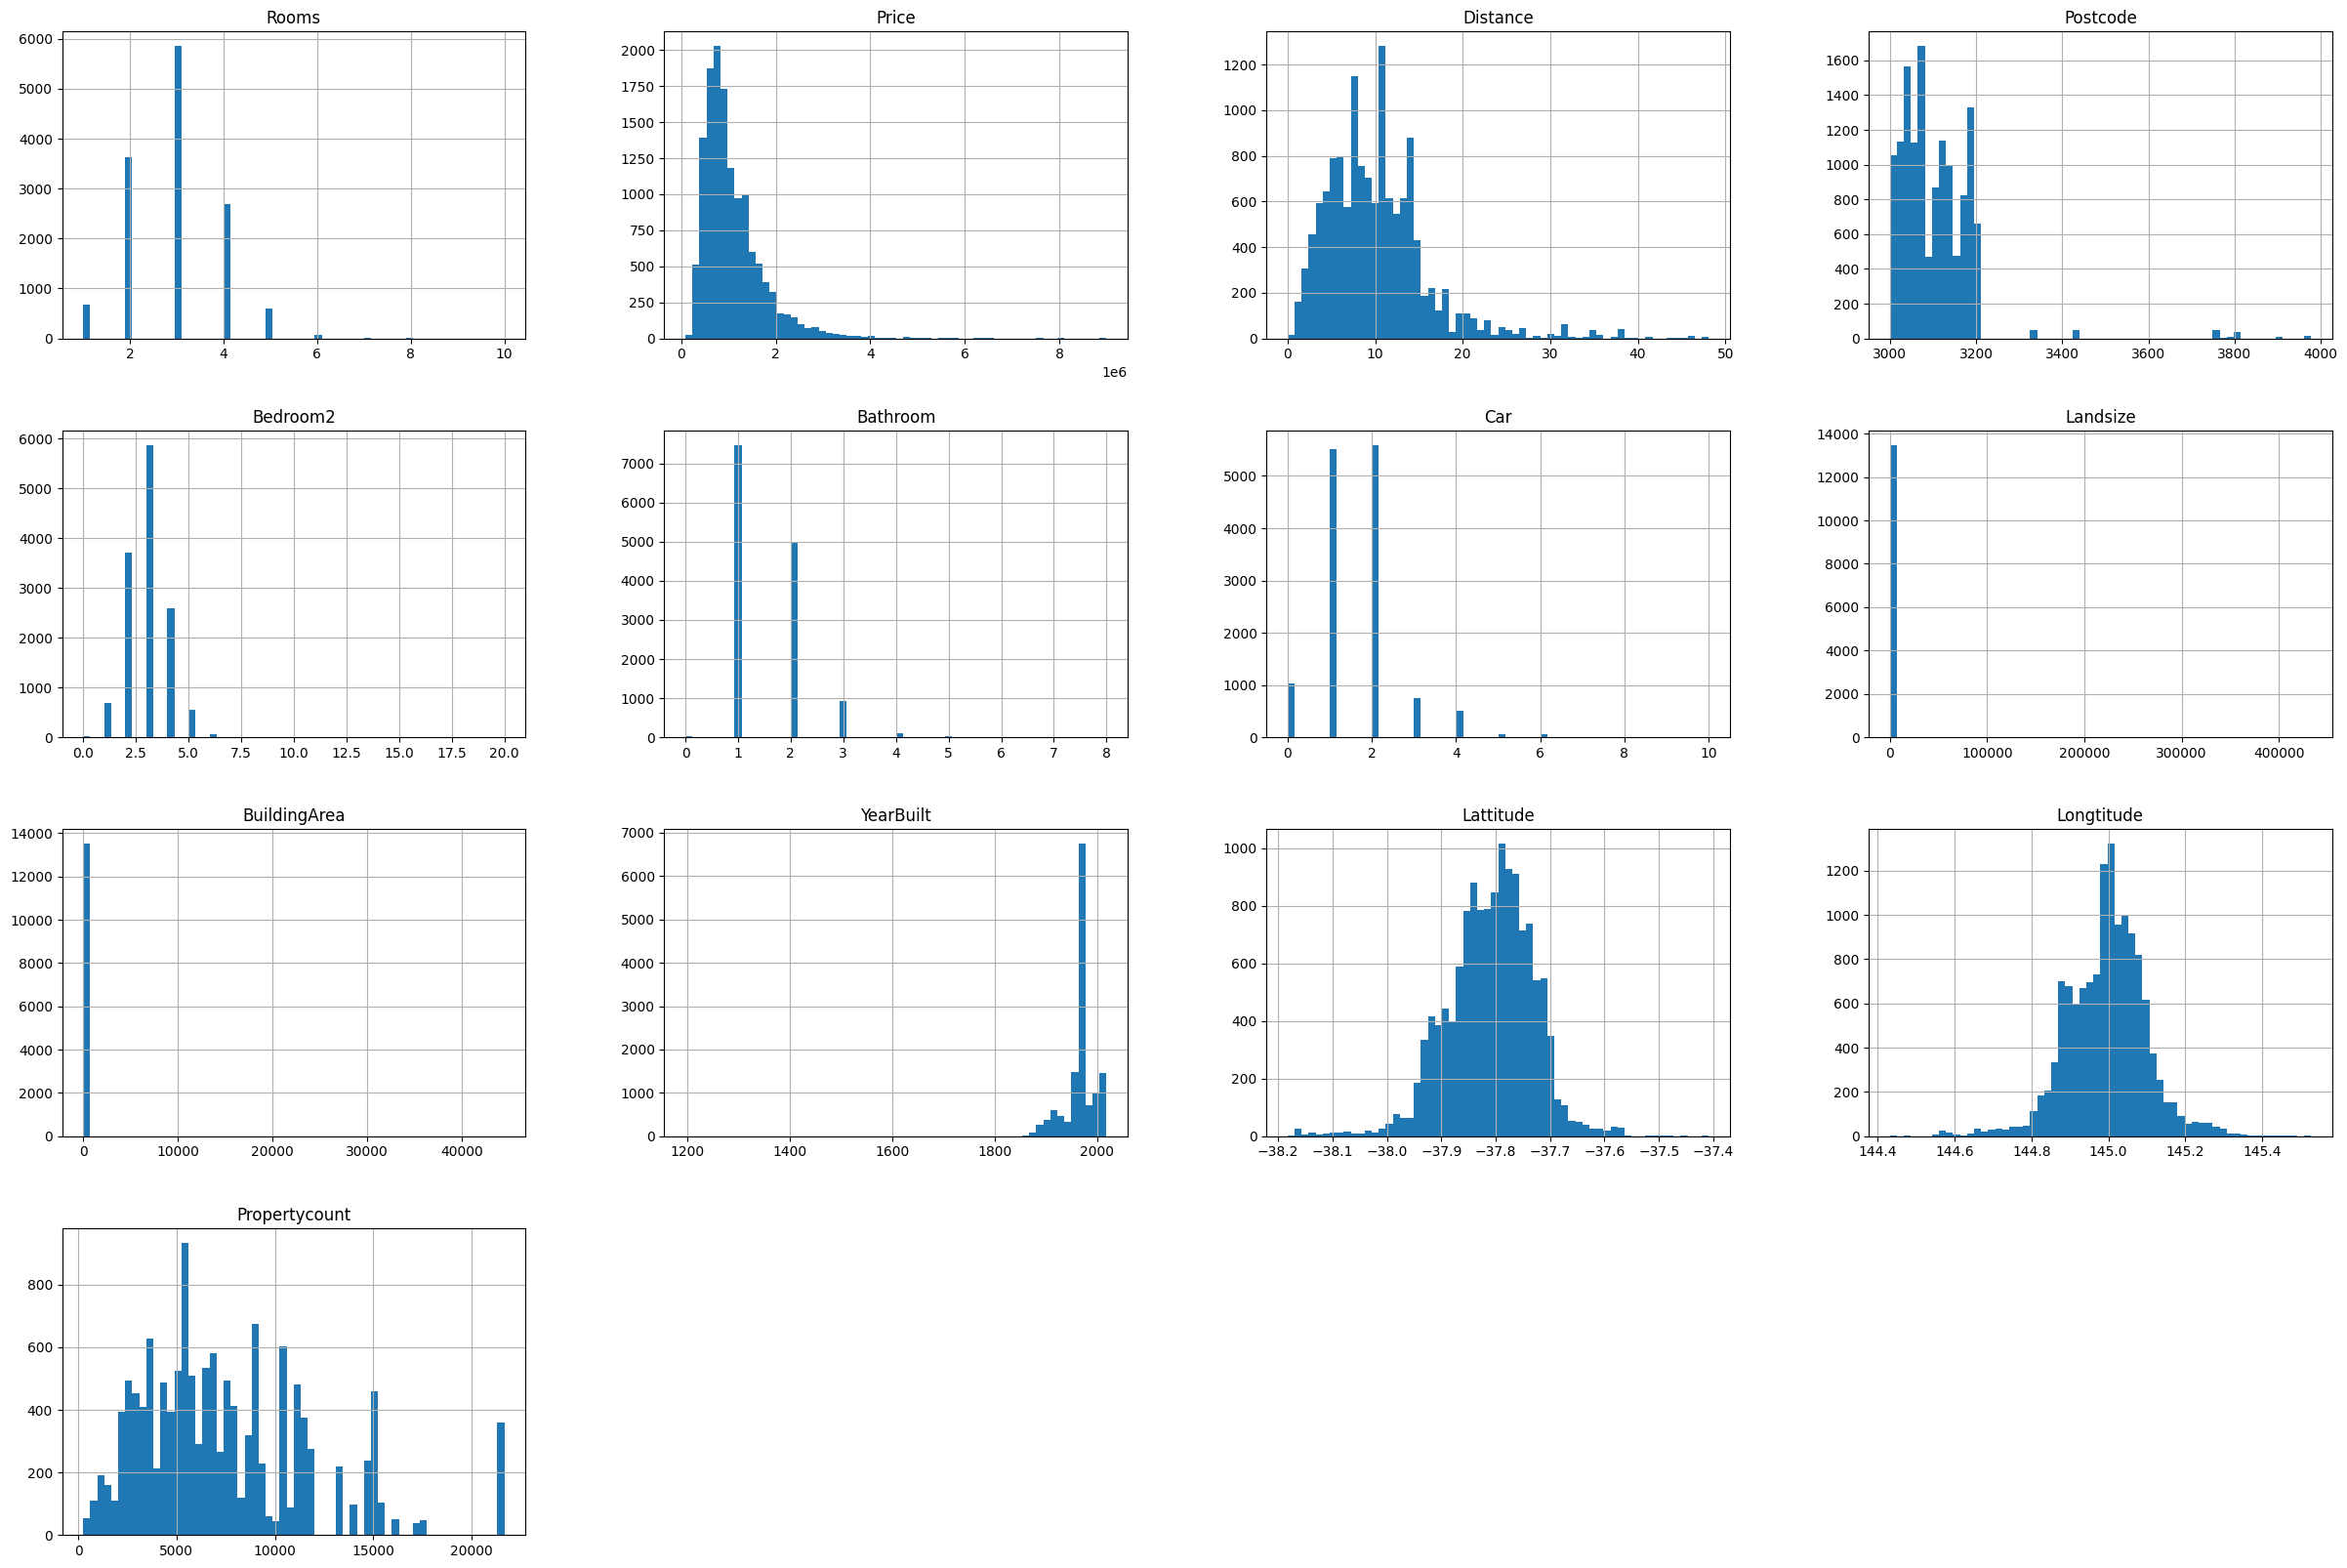

In [60]:
df_subset.hist(bins = 60, figsize = (30, 20))

##Correction

Assuming lets say "YearBuilt", very little use of considering houses built before 1800, so remove them

In [61]:
df_subset = df_subset[df_subset["YearBuilt"] > 1800]

array([[<Axes: title={'center': 'Rooms'}>,
        <Axes: title={'center': 'Price'}>,
        <Axes: title={'center': 'Distance'}>,
        <Axes: title={'center': 'Postcode'}>],
       [<Axes: title={'center': 'Bedroom2'}>,
        <Axes: title={'center': 'Bathroom'}>,
        <Axes: title={'center': 'Car'}>,
        <Axes: title={'center': 'Landsize'}>],
       [<Axes: title={'center': 'BuildingArea'}>,
        <Axes: title={'center': 'YearBuilt'}>,
        <Axes: title={'center': 'Lattitude'}>,
        <Axes: title={'center': 'Longtitude'}>],
       [<Axes: title={'center': 'Propertycount'}>, <Axes: >, <Axes: >,
        <Axes: >]], dtype=object)

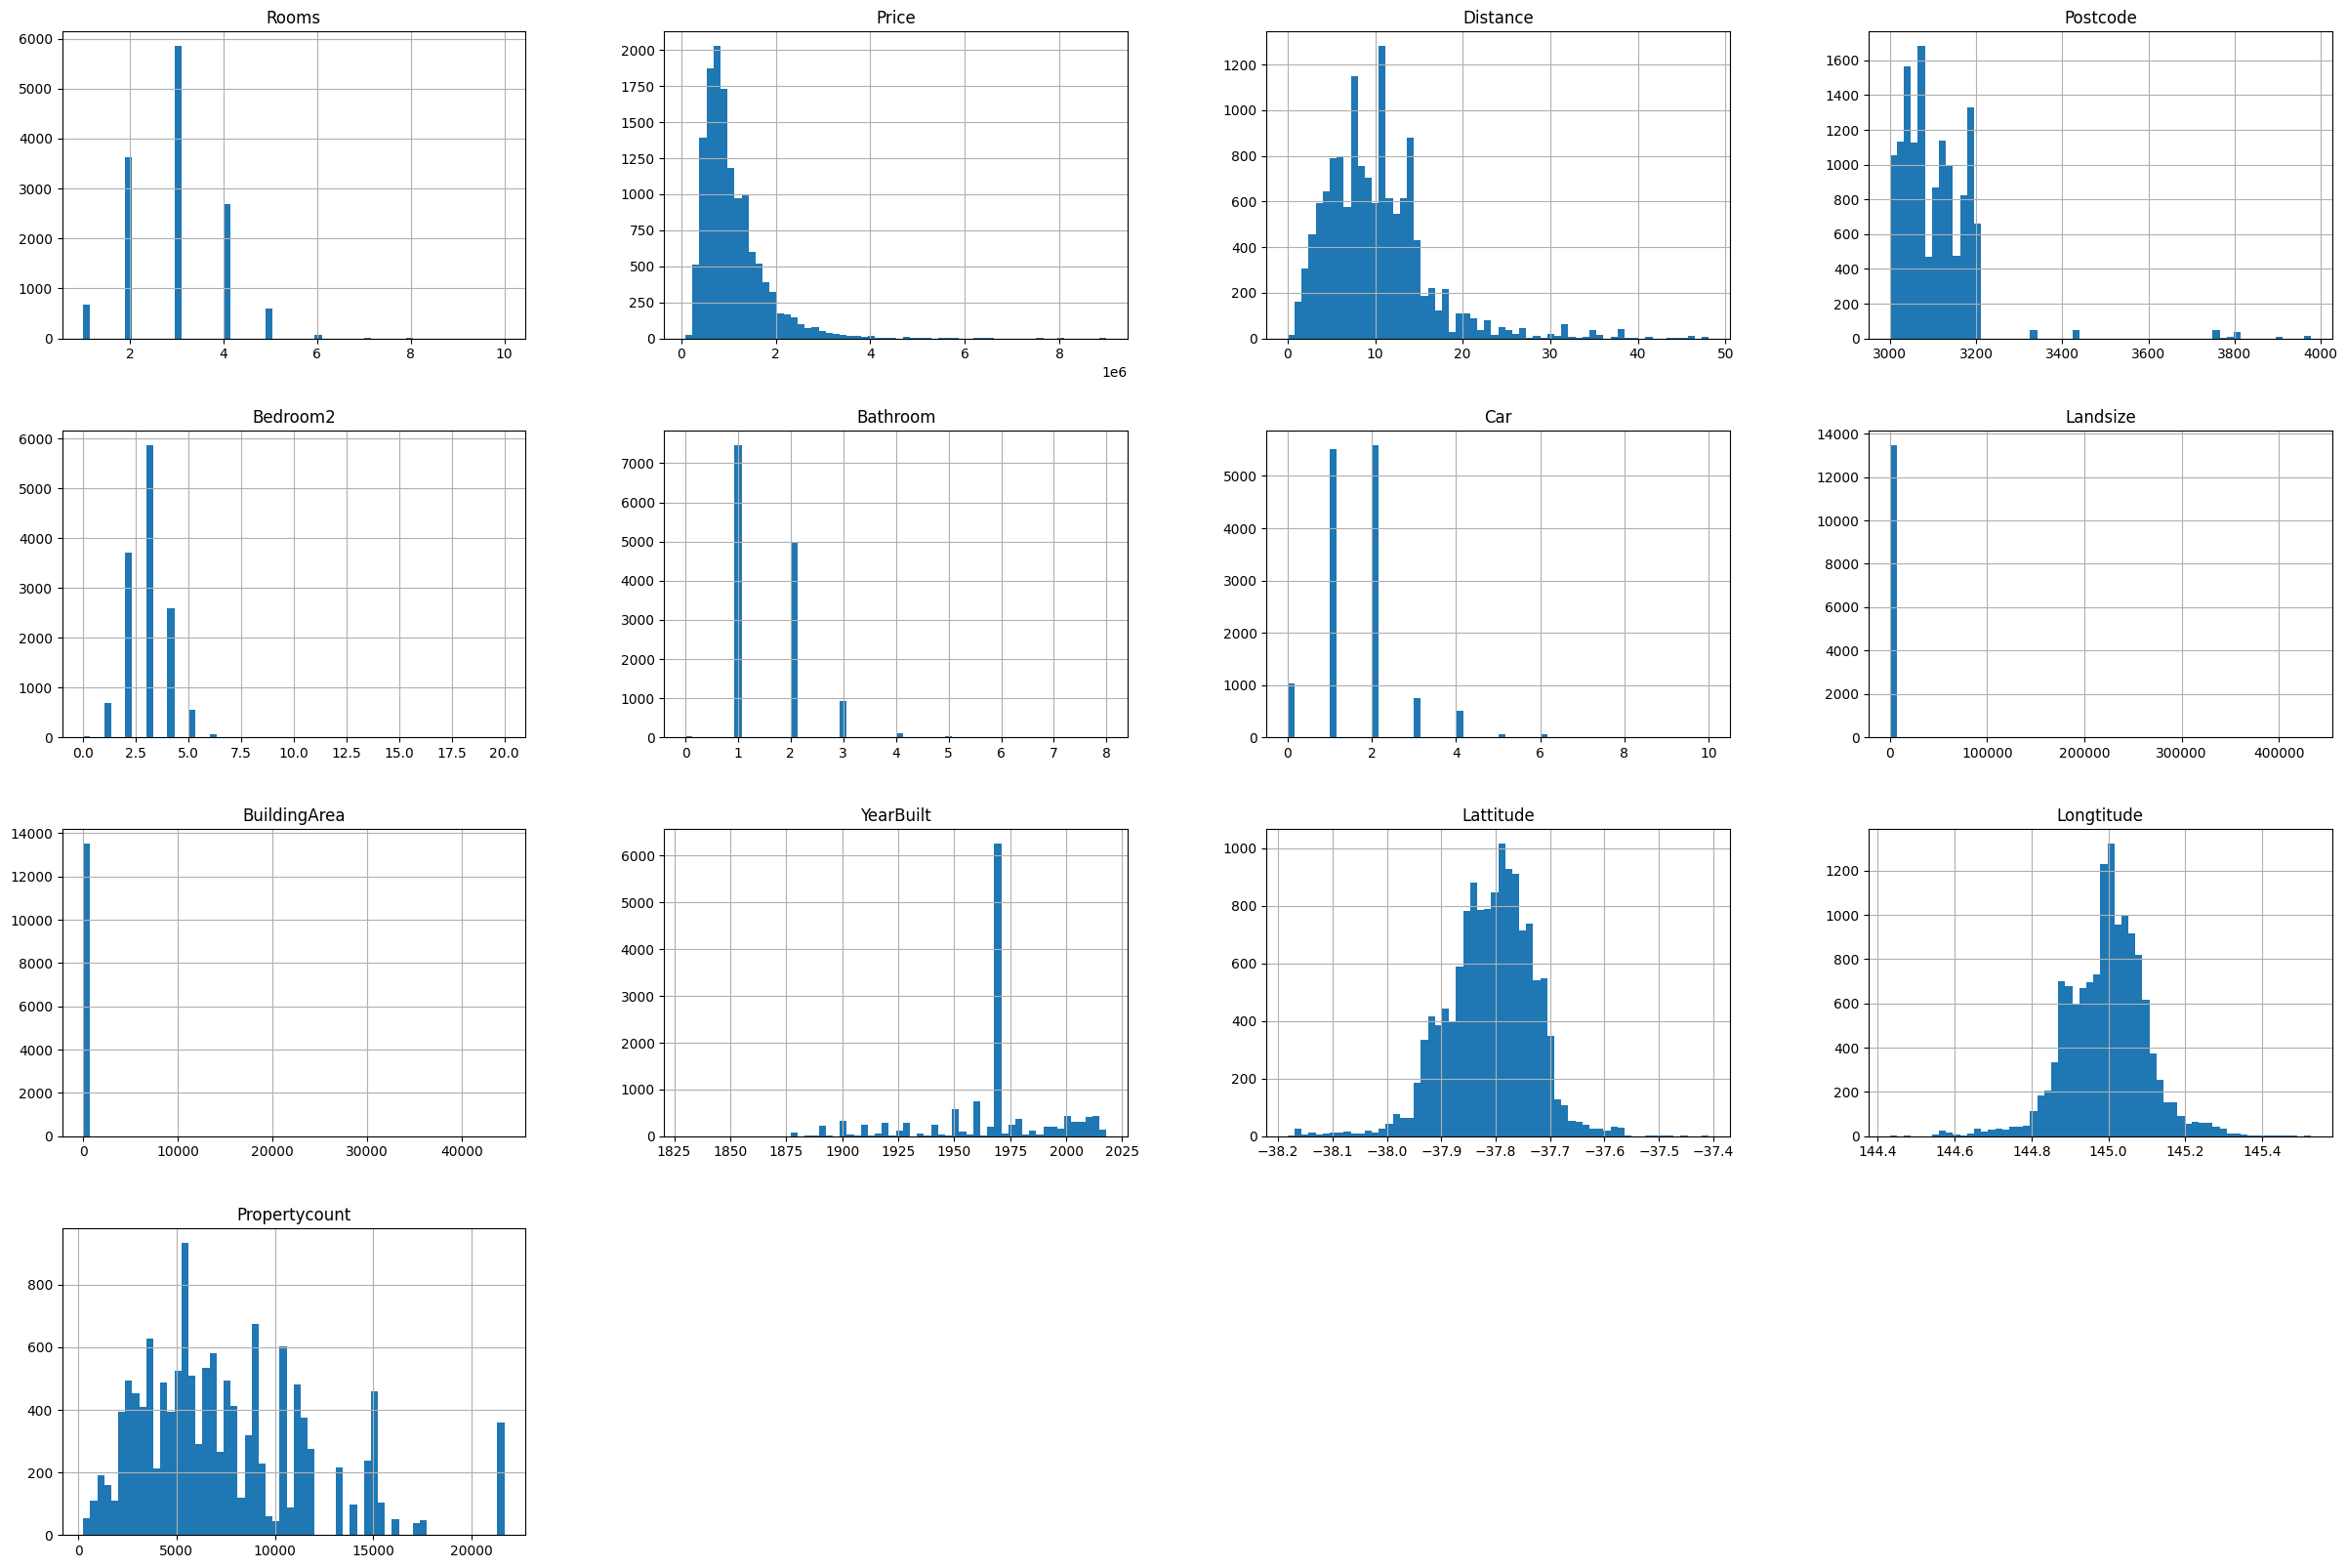

In [62]:
df_subset.hist(bins = 60, figsize = (30, 20))

#Feature Scaling

##Standardization

Cannot standardize the whole feature set there are strings in it as well. So we need to drop the non-numerical and categorical cols.

In [63]:
df_subset.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,152.128903,1970.0,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.000000,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.000000,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,...,2.0,1.0,94.0,152.128903,1970.0,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.000000,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0


In [64]:
X = df_subset.drop(['Suburb', 'Address', 'Type', 'Method', 'SellerG', 'Date', 'Postcode', 'Bathroom', 'Rooms', 'Car', 'YearBuilt', 'CouncilArea', 'Lattitude', 'Longtitude', 'Regionname', 'Bedroom2', 'Bathroom'], axis = 1)
X.describe()
print(X.dtypes)


Price            float64
Distance         float64
Landsize         float64
BuildingArea     float64
Propertycount    float64
dtype: object


In [65]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_scaled = scaler.fit_transform(X)
X_scaled_df = pd.DataFrame(X_scaled, columns = X.columns)
X_scaled_df.describe()

,Price,Distance,Landsize,BuildingArea,Propertycount
count,1.351700e+04,1.351700e+04,1.351700e+04,1.351700e+04,1.351700e+04
mean,-1.261598e-17,2.691410e-16,-1.261598e-17,-4.625861e-17,1.366732e-17
std,1.000037e+00,1.000037e+00,1.000037e+00,1.000037e+00,1.000037e+00
min,-1.546886e+00,-1.732926e+00,-1.395861e-01,-3.872067e-01,-1.644787e+00
25%,-6.638776e-01,-6.751743e-01,-9.506597e-02,-7.669103e-02,-7.018821e-01
50%,-2.716028e-01,-1.633591e-01,-2.903615e-02,-6.614668e-06,-2.026973e-01
75%,3.957331e-01,4.849402e-01,2.323745e-02,-6.614668e-06,6.564393e-01
max,1.238590e+01,6.473178e+00,1.081628e+02,1.129129e+02,3.240012e+00


##Normalisation

In [66]:
X = df_subset.drop(['Suburb', 'Address', 'Type', 'Method', 'SellerG', 'Date', 'Postcode', 'Bathroom', 'Rooms', 'Car', 'YearBuilt', 'CouncilArea', 'Lattitude', 'Longtitude', 'Regionname', 'Bedroom2', 'Bathroom'], axis = 1)

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

X_scaled = scaler.fit_transform(X)
X_scaled_df = pd.DataFrame(X_scaled, columns = X.columns)
X_scaled_df.describe()

,Price,Distance,Landsize,BuildingArea,Propertycount
count,13517.000000,13517.000000,13517.000000,13517.000000,13517.000000
mean,0.111025,0.211175,0.001289,0.003418,0.336715
std,0.071776,0.121865,0.009234,0.008826,0.204724
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.063376,0.128898,0.000411,0.002741,0.193028
50%,0.091531,0.191268,0.001021,0.003417,0.295220
75%,0.139428,0.270270,0.001503,0.003417,0.471099
max,1.000000,1.000000,1.000000,1.000000,1.000000


#Encoding
Converting categorical data (specifically string) to numerical, so that algorithms can use it.

##One Hot encoding

In [73]:
d = {'sales': [100000,222000,1000000,522000,111111,222222,1111111,20000,75000,90000,1000000,10000],
      'city': ['Tampa','Tampa','Orlando','Jacksonville','Miami','Jacksonville','Miami','Miami','Orlando','Orlando','Orlando','Orlando'],
      'size': ['Small', 'Medium','Large','Large','Small','Medium','Large','Small','Medium','Medium','Medium','Small',]}

df = pd.DataFrame(d)
df.head()

,sales,city,size
0,100000,Tampa,Small
1,222000,Tampa,Medium
2,1000000,Orlando,Large
3,522000,Jacksonville,Large
4,111111,Miami,Small


In [74]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(handle_unknown = 'ignore', sparse_output = False).set_output(transform = 'pandas')
ohe_transform = ohe.fit_transform(df[['city']])
ohe_transform

,city_Jacksonville,city_Miami,city_Orlando,city_Tampa
0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,1.0
2,0.0,0.0,1.0,0.0
3,1.0,0.0,0.0,0.0
4,0.0,1.0,0.0,0.0
5,1.0,0.0,0.0,0.0
6,0.0,1.0,0.0,0.0
7,0.0,1.0,0.0,0.0
8,0.0,0.0,1.0,0.0
9,0.0,0.0,1.0,0.0


In [75]:
df = pd.concat([df, ohe_transform], axis = 1)

In [76]:
df = df.drop('city', axis = 1)
df

,sales,size,city_Jacksonville,city_Miami,city_Orlando,city_Tampa
0,100000,Small,0.0,0.0,0.0,1.0
1,222000,Medium,0.0,0.0,0.0,1.0
2,1000000,Large,0.0,0.0,1.0,0.0
3,522000,Large,1.0,0.0,0.0,0.0
4,111111,Small,0.0,1.0,0.0,0.0
5,222222,Medium,1.0,0.0,0.0,0.0
6,1111111,Large,0.0,1.0,0.0,0.0
7,20000,Small,0.0,1.0,0.0,0.0
8,75000,Medium,0.0,0.0,1.0,0.0
9,90000,Medium,0.0,0.0,1.0,0.0


##Ordinal encoding

In [78]:
d = {'sales': [100000,222000,1000000,522000,111111,222222,1111111,20000,75000,90000,1000000,10000],
      'city': ['Tampa','Tampa','Orlando','Jacksonville','Miami','Jacksonville','Miami','Miami','Orlando','Orlando','Orlando','Orlando'],
      'size': ['Small', 'Medium','Large','Large','Small','Medium','Large','Small','Medium','Medium','Medium','Small',]}

df = pd.DataFrame(d)
df.head()
df['size'].unique()

array(['Small', 'Medium', 'Large'], dtype=object)

In [85]:
from sklearn.preprocessing import OrdinalEncoder

oe = OrdinalEncoder(categories = [['Small', 'Medium', 'Large']]).set_output(transform = 'pandas')
oe_transform = oe.fit_transform(df[['size']])
oe_transform.head()

,size
0,0.0
1,1.0
2,2.0
3,2.0
4,0.0


In [86]:
df = df.drop('size', axis = 1)
df = pd.concat([df, oe_transform], axis = 1)
df.head()

,sales,city,size
0,100000,Tampa,0.0
1,222000,Tampa,1.0
2,1000000,Orlando,2.0
3,522000,Jacksonville,2.0
4,111111,Miami,0.0
